In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import scipy
import jax.numpy as jnp

In [5]:
#observed data
filename = "../simulation/observed_data/observed_stats.csv"
x_o = pd.read_csv(filename)
#simulated data
filename2 = "../simulation/output/round_1/summary_stats_r1.csv"
x = pd.read_csv(filename2)
filename4 = "../simulation/output/round_2/summary_stats_r2.csv"
x2 = pd.read_csv(filename4)
#filename5 = "./previous/summary_stats_r3.csv"
#x3 = pd.read_csv(filename5)
#filename6 = "./previous/summary_stats_r4.csv"
#x4 = pd.read_csv(filename6)
#params for simulations
filename3 = "../simulation/output/round_2/thetas_r2.csv"
theta = jnp.array(np.genfromtxt(filename3, delimiter=',', dtype=float))

In [27]:
to_drop = [#correlation >0.99
    "y1_domestic",
    "y1_scot",
    "y1_captive",
    "y1_eu",
    "y1_lyb",
    "y3_domestic_captive_lyb",
    "divergence_domestic_eu",
    "y3_domestic_scot_lyb",
    "y3_domestic_eu_lyb",
    "divergence_captive_lyb",
    "segregating_sites_lyb",
    "segregating_sites_eu",
    "divergence_scot_lyb",
    "f4_domestic_scot_captive_lyb",
    "f4_domestic_captive_eu_lyb",
    "f4_domestic_scot_eu_lyb",
    "diversity_domestic",
    "y3_domestic_scot_captive",
    "y3_scot_captive_eu",
    "f2_domestic_eu",
    "y2_domestic_lyb",
    "y3_scot_captive_lyb",
    "divergence_captive_eu",
    "pc1_dist_domestic_eu",
    # outlier noise model method r1 (>1)
    'tajimas_d_eu',
    'relatedness_domestic_lyb',
    'pc1_iqr_domestic',
    'pc1_iqr_eu',
    'pc1_iqr_lyb',
    'pc2_iqr_domestic',
    'pc2_iqr_lyb',
    # outlier noise model method r2 (>0.8)
    'relatedness_captive_lyb',
    'pc1_median_eu',
    'pc2_dist_domestic_lyb',
    # drop_one algorithm, achieved 0.7788 hdr
    'pc2_iqr_eu',
    'relatedness_domestic_eu',
    'tajimas_d_lyb',
    'pc1_dist_captive_eu',
    'fst_scot_lyb',
    'pc2_iqr_scot',
    'pc1_dist_scot_lyb',
    'pc1_dist_eu_lyb']

In [16]:
stats = x_o.columns
x = x.to_numpy(dtype=np.float32)
print(np.shape(x))
x_o = x_o.to_numpy(dtype=np.float32)
print(np.shape(x_o))

(10000, 134)
(1, 134)


In [28]:
x_o = x_o.drop(columns=to_drop)
stats = x_o.columns
x = x.drop(columns=to_drop)
#x2 = x2.drop(columns=to_drop)
#x3 = x3.drop(columns=to_drop)
#x4 = x4.drop(columns=to_drop)
combined_x = pd.concat([ x, x2, x3, x4], ignore_index=True)

x_o = x_o.to_numpy(dtype=np.float32)
print(np.shape(x_o))
x = x.to_numpy(dtype=np.float32)
print(np.shape(x))
x2 = x2.to_numpy(dtype=np.float32)
print(np.shape(x2))
x3 = x3.to_numpy(dtype=np.float32)
print(np.shape(x2))
x4 = x4.to_numpy(dtype=np.float32)
print(np.shape(x2))
combined_x = combined_x.to_numpy(dtype=np.float32)
print(np.shape(combined_x))

(1, 102)
(10000, 102)
(10001, 102)
(10001, 102)
(10001, 102)
(39881, 102)


In [17]:
lims = []
for stat in range(0,134):
    p1 = np.percentile(x[:,stat], 1)
    p2 = np.percentile(x[:,stat], 99)
    lims.append([p1,p2])

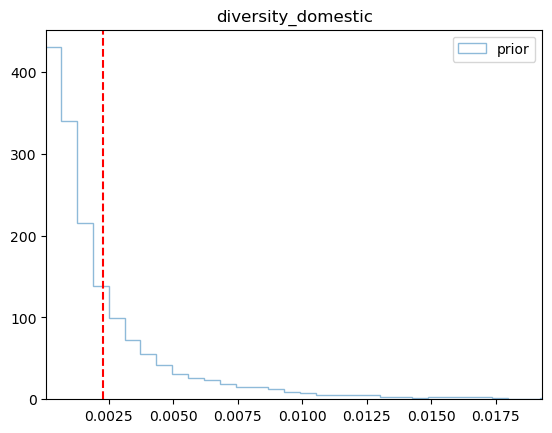

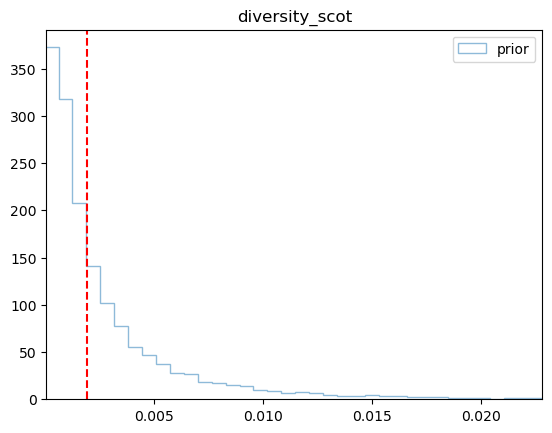

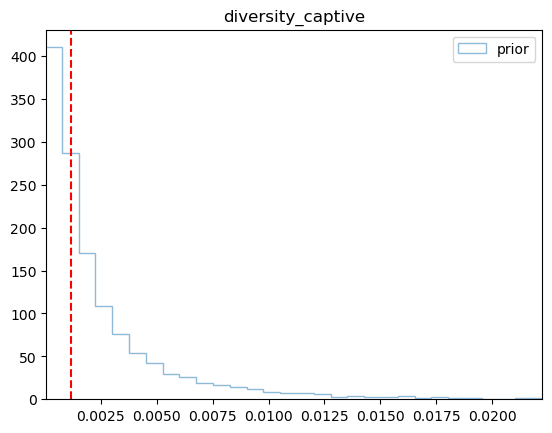

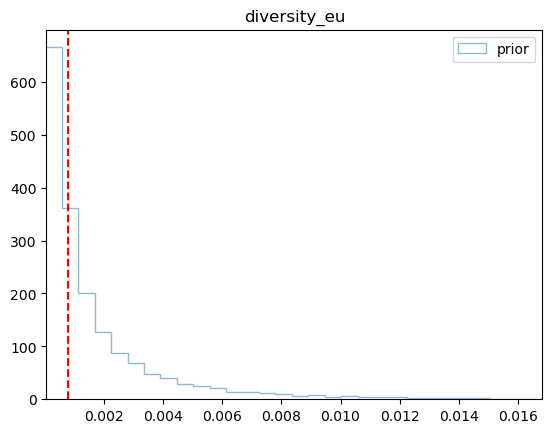

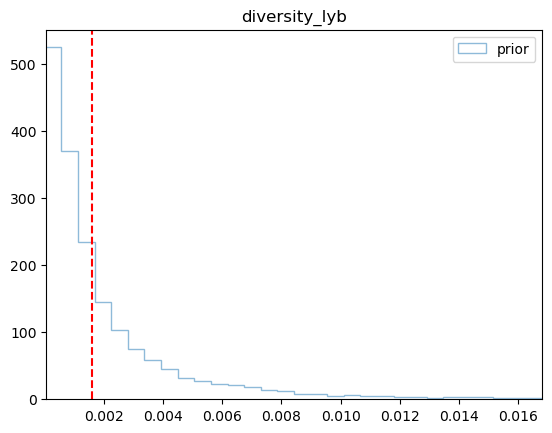

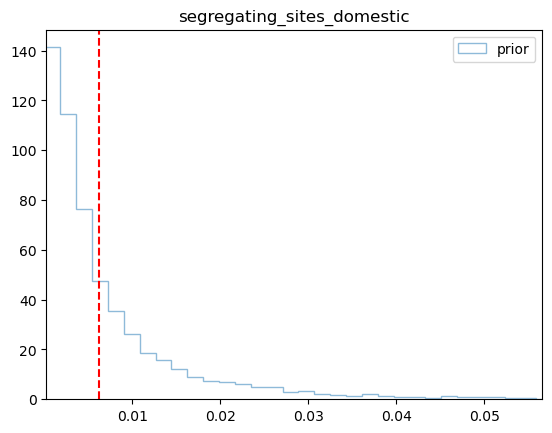

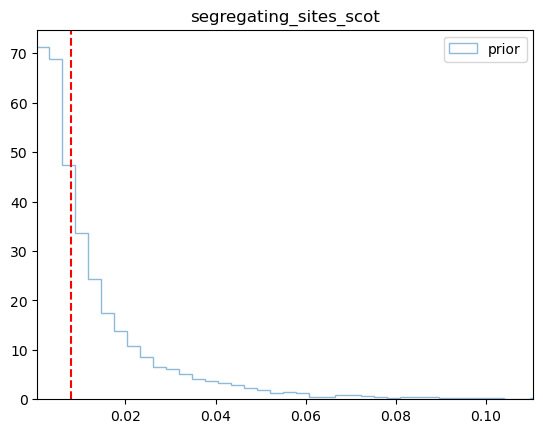

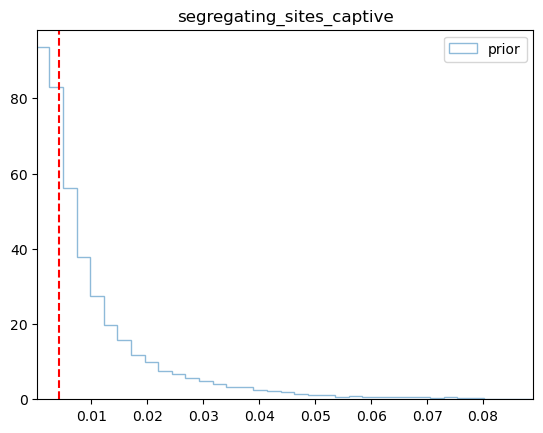

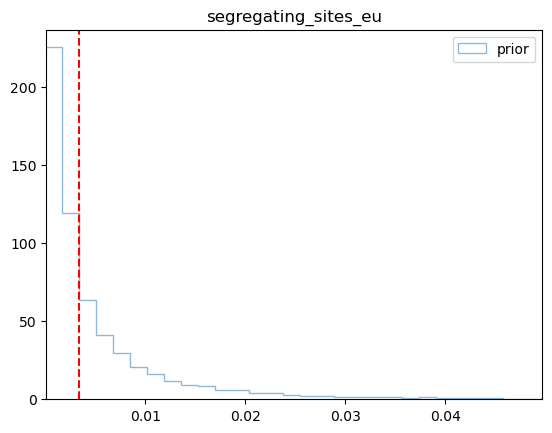

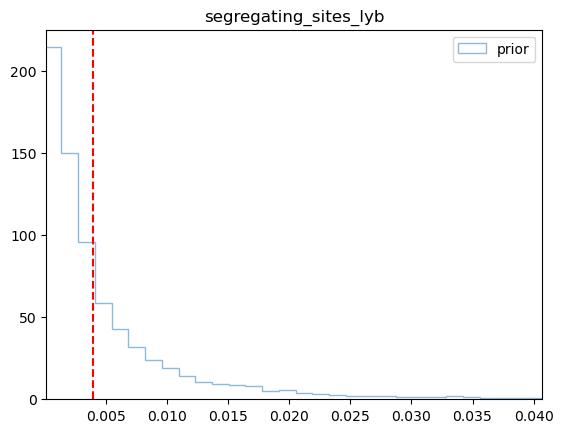

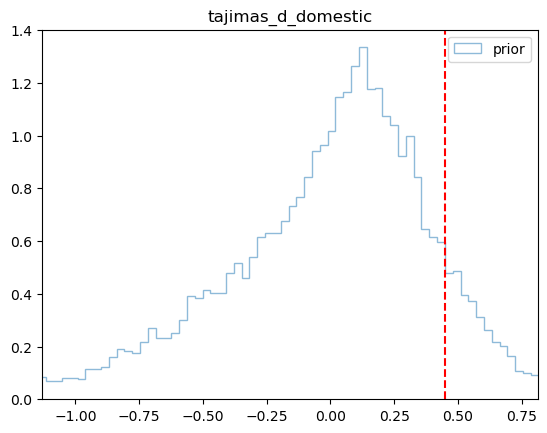

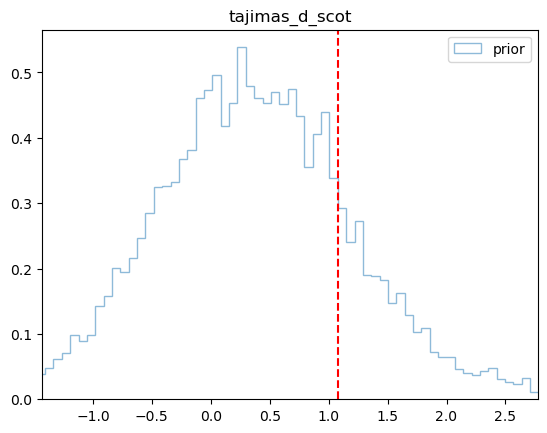

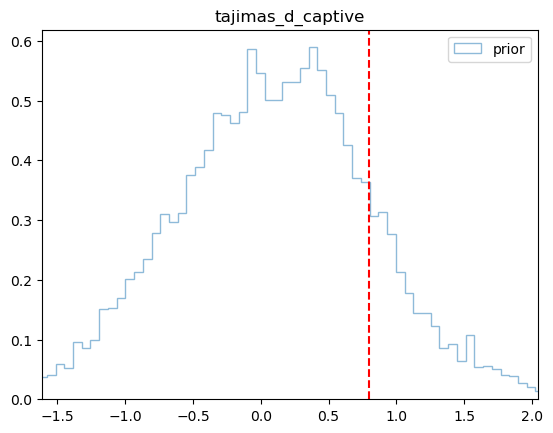

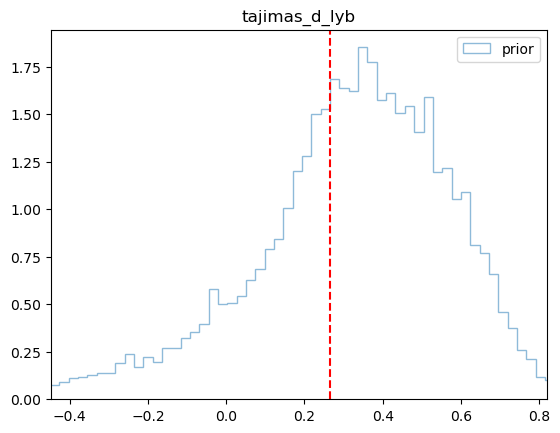

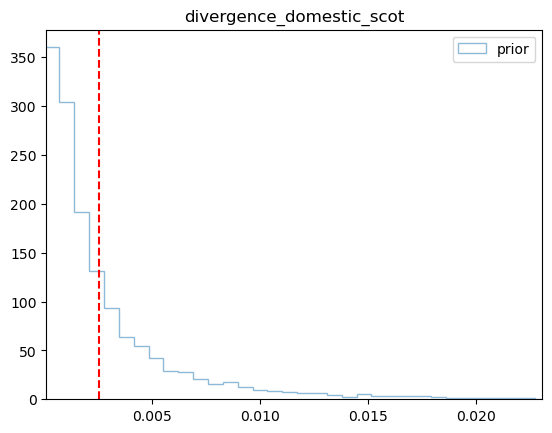

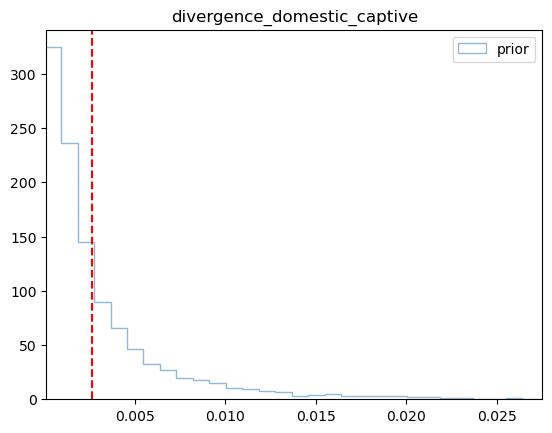

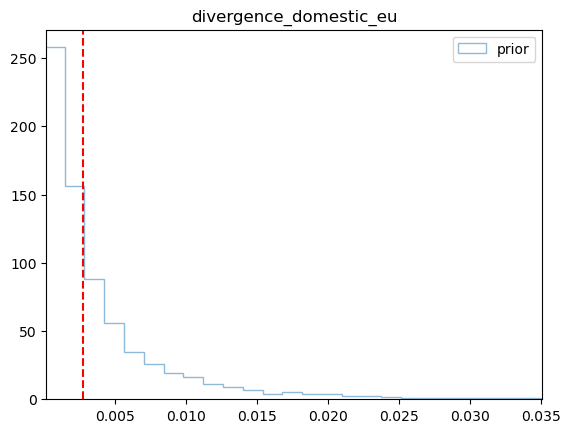

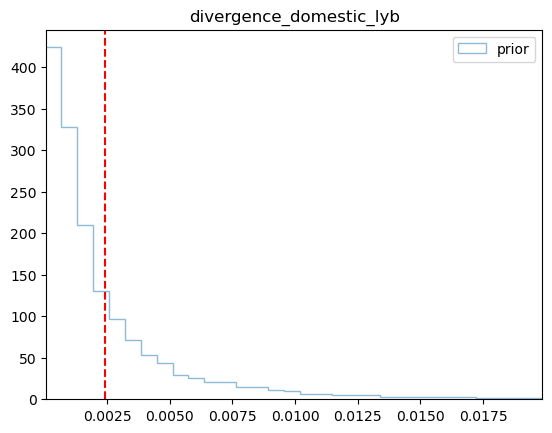

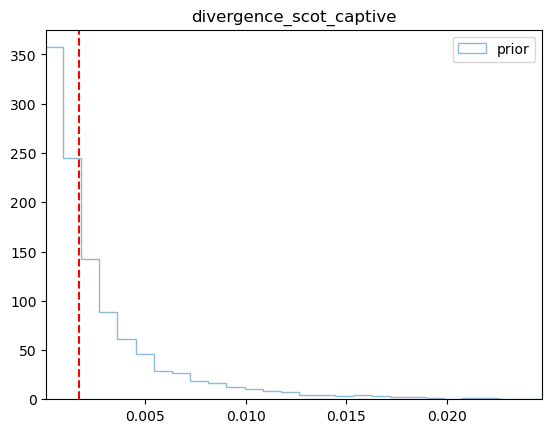

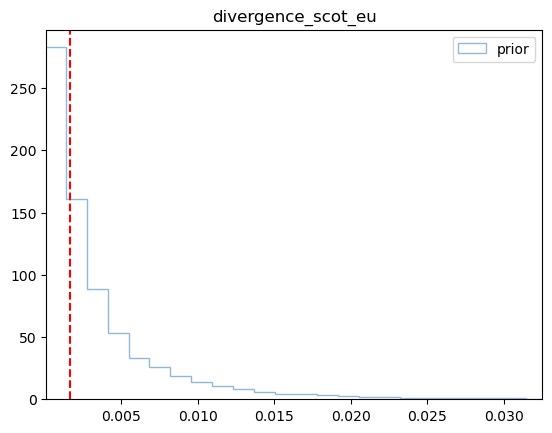

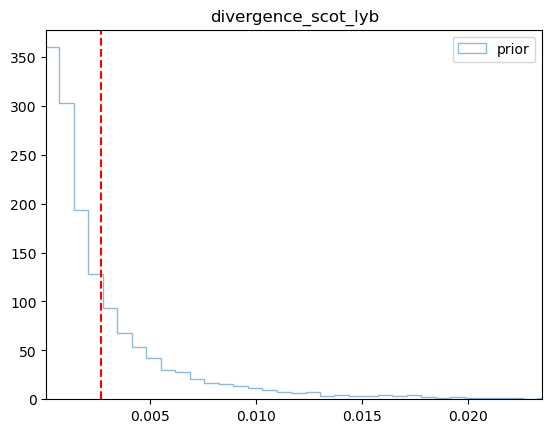

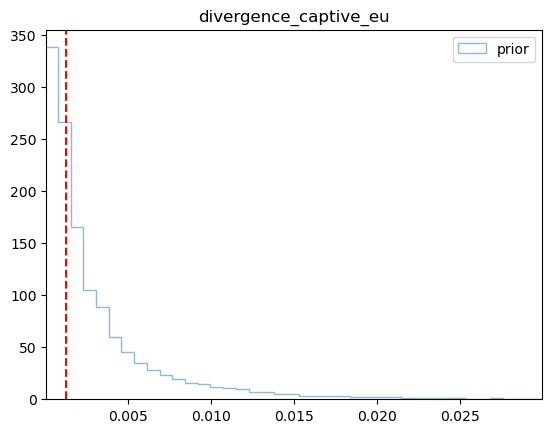

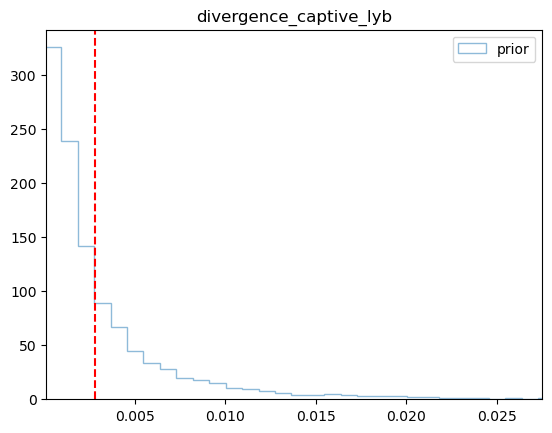

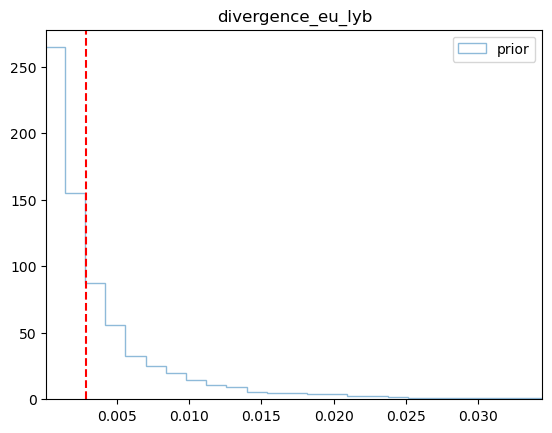

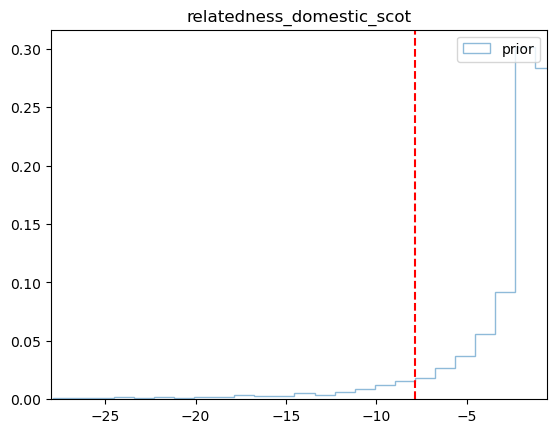

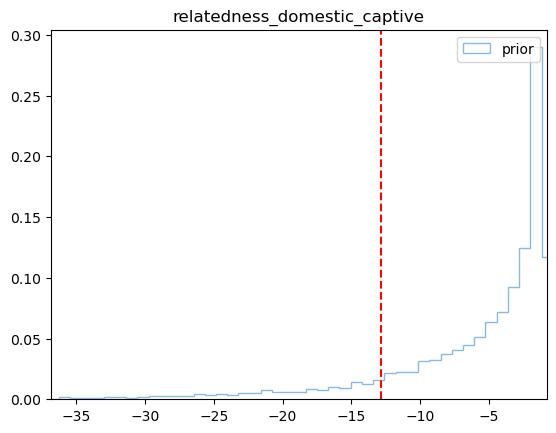

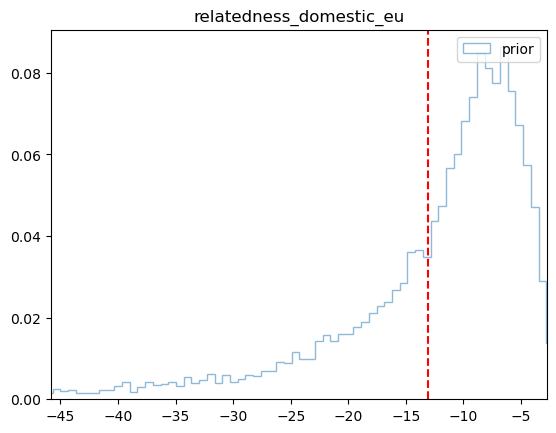

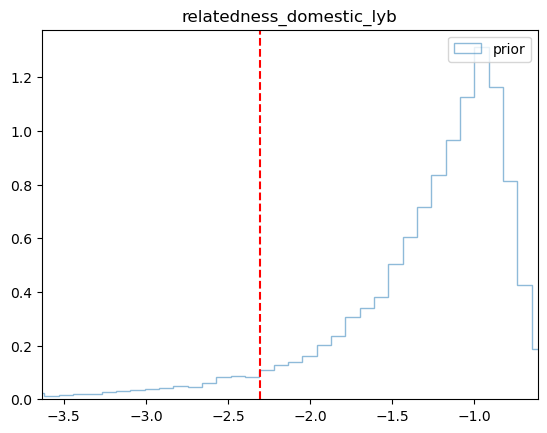

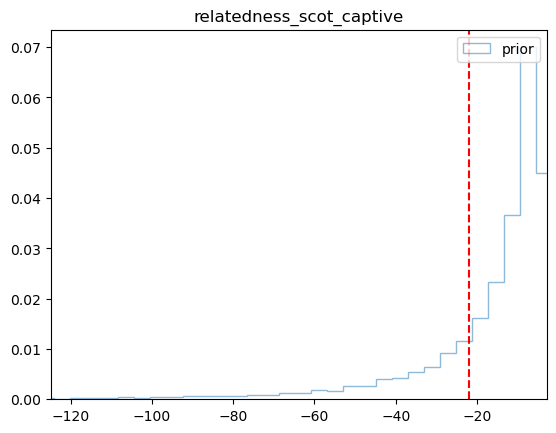

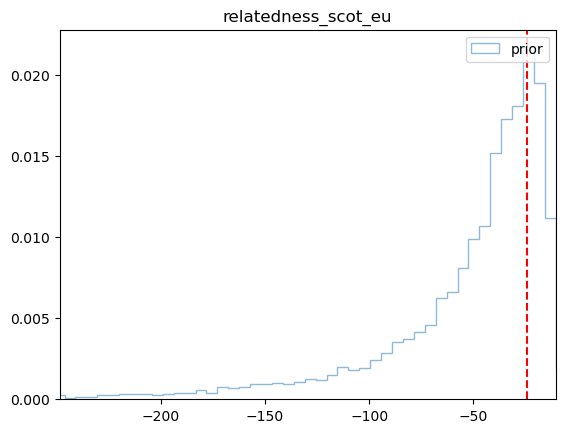

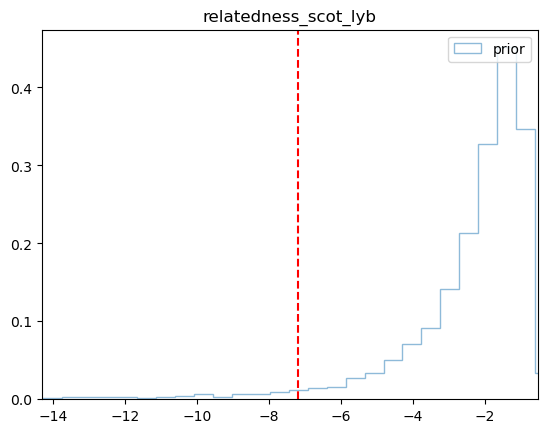

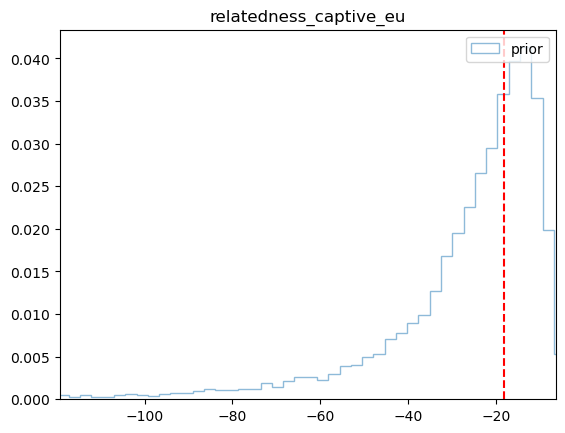

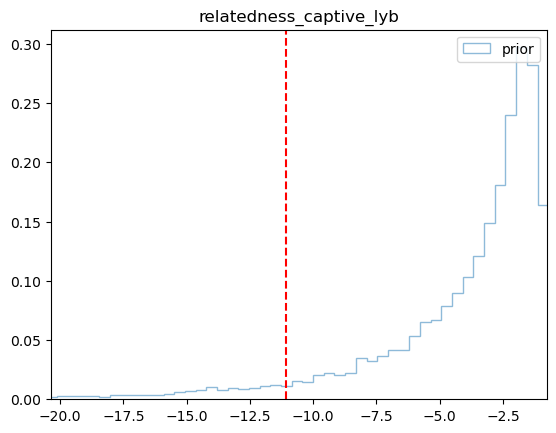

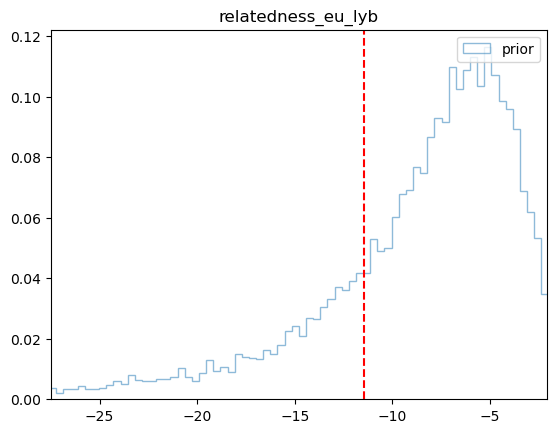

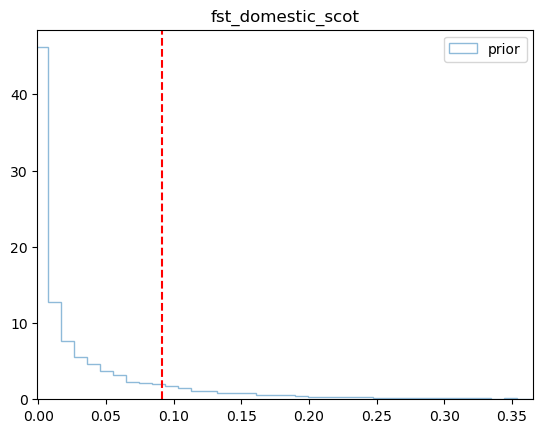

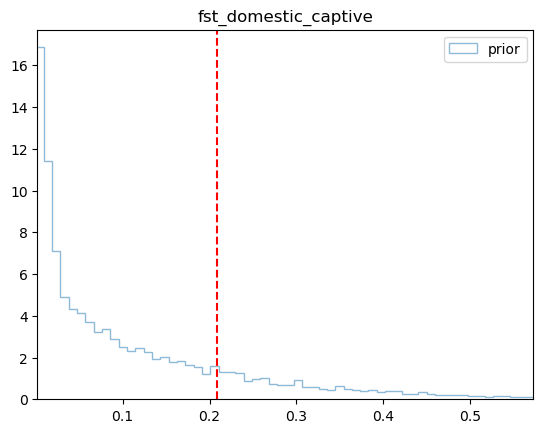

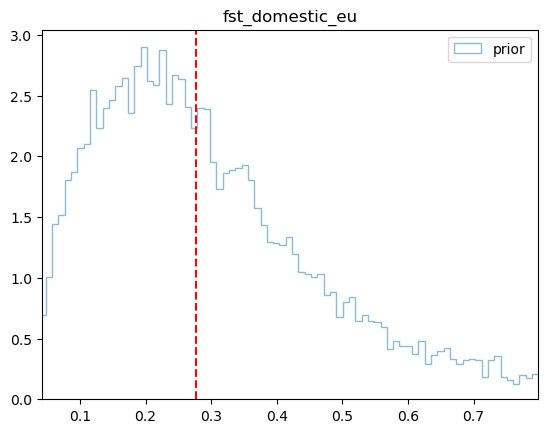

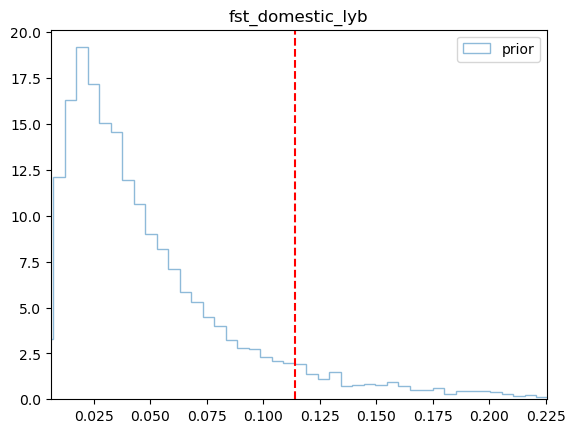

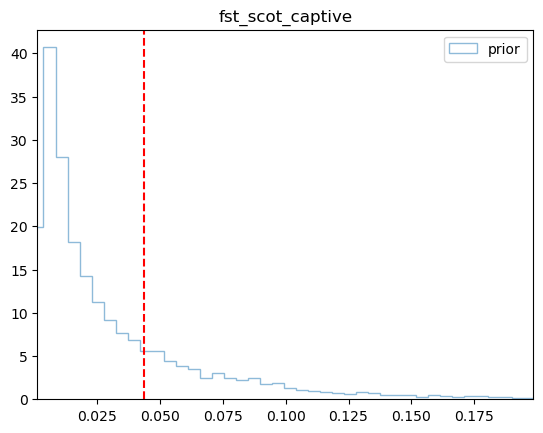

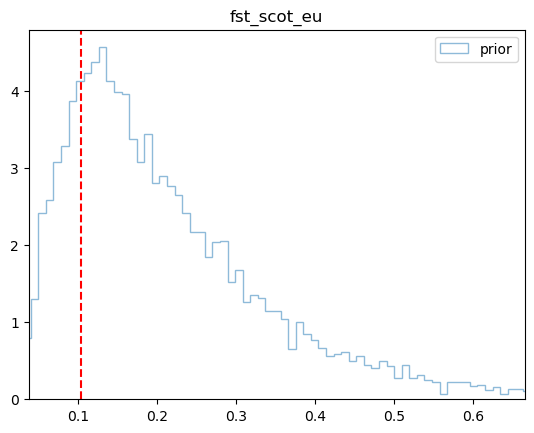

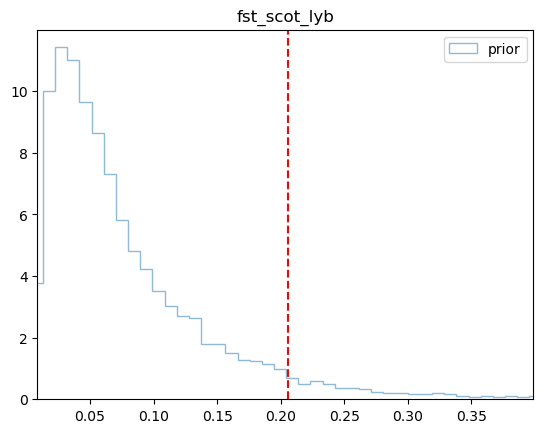

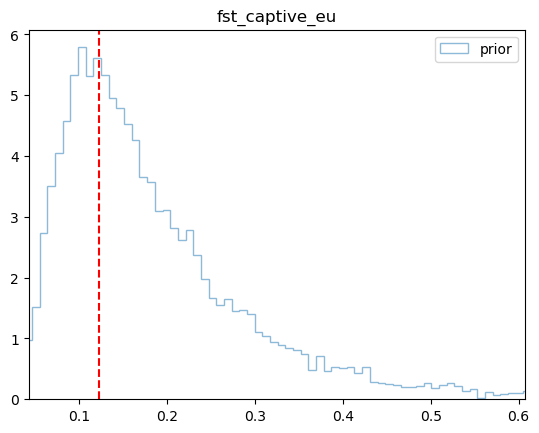

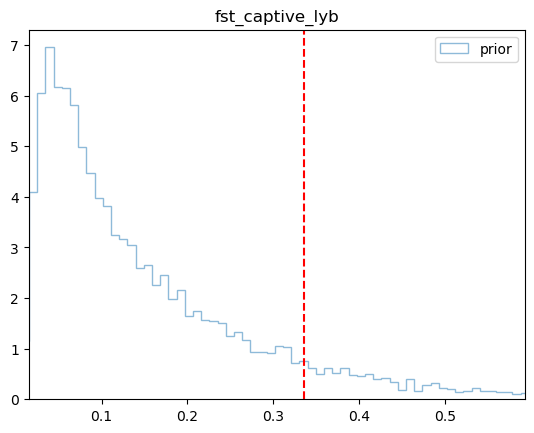

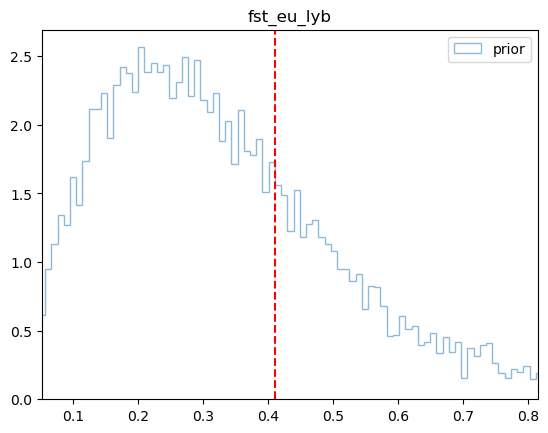

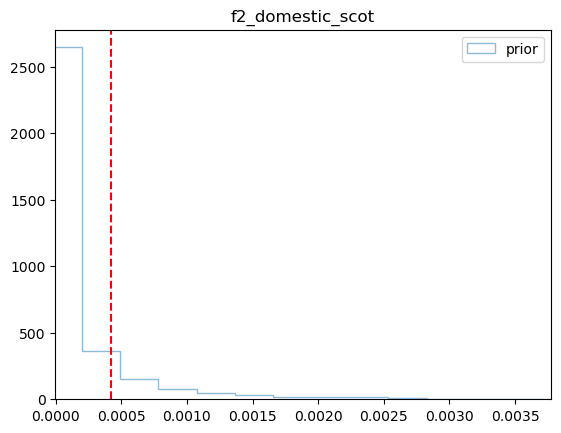

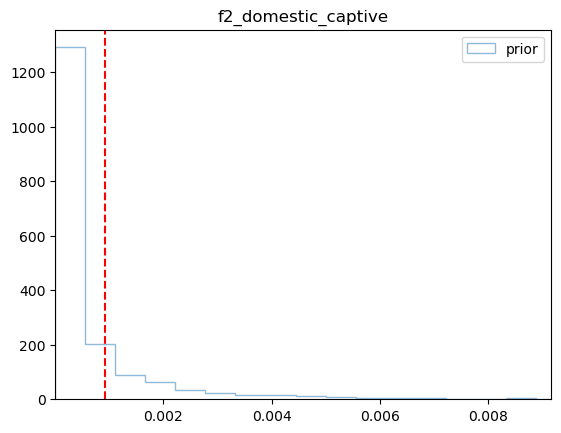

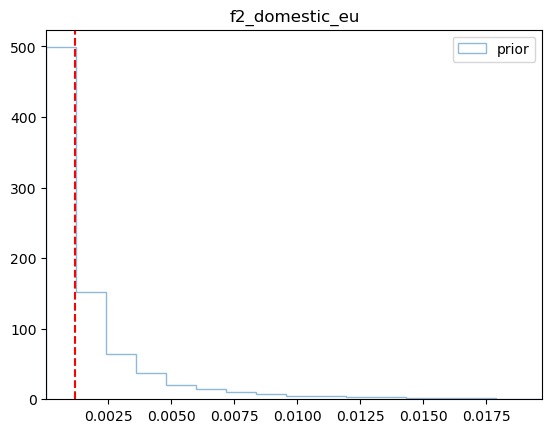

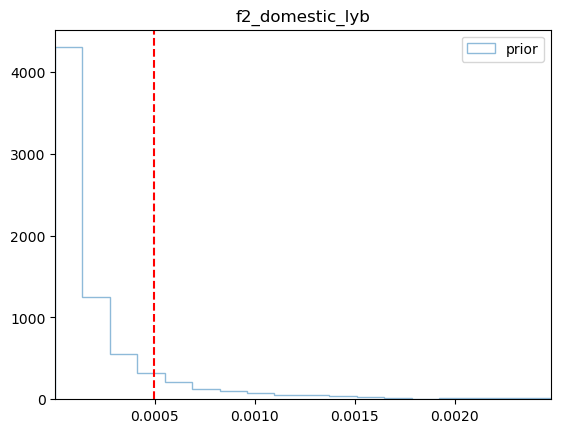

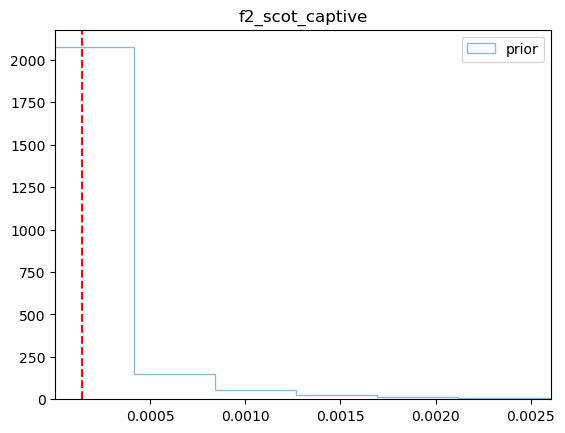

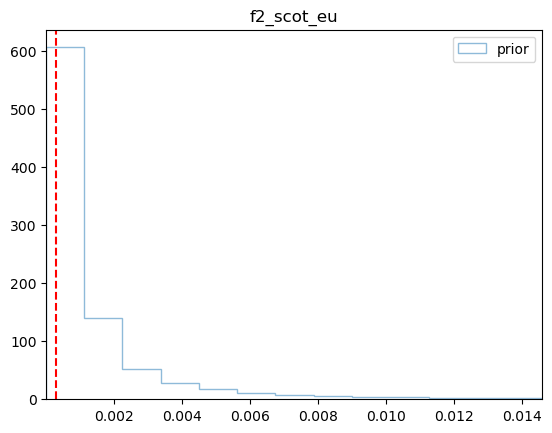

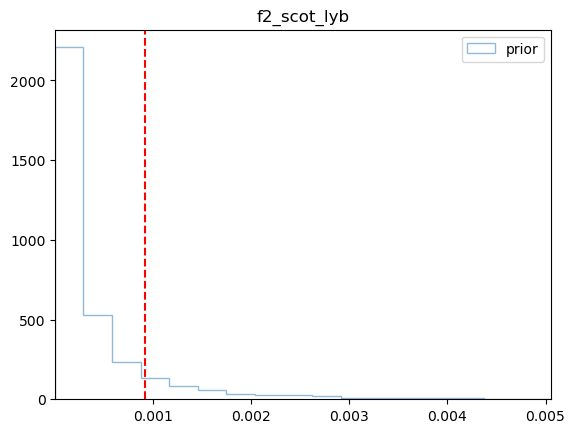

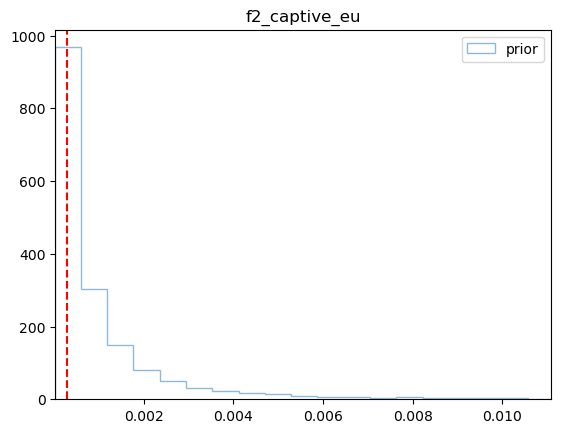

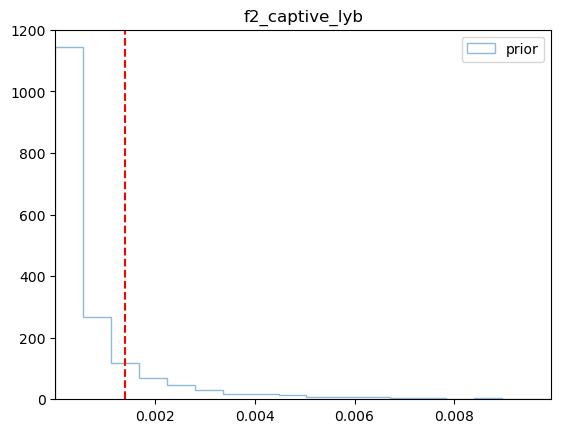

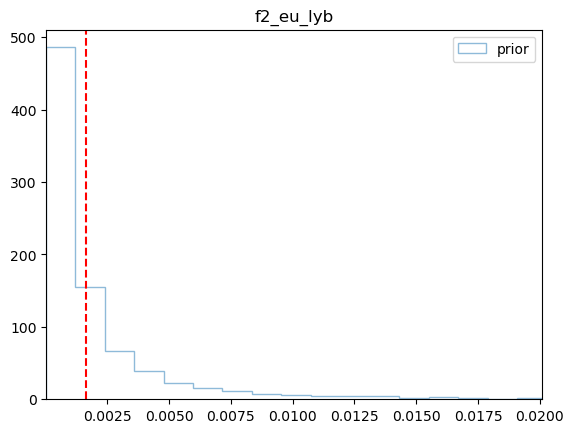

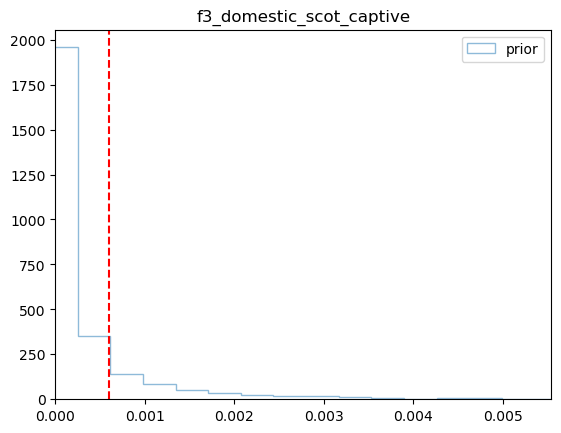

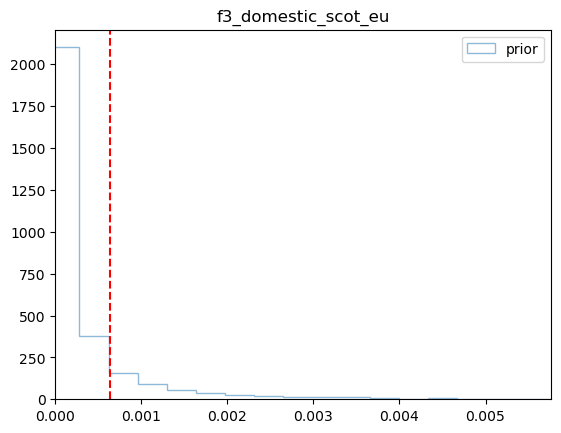

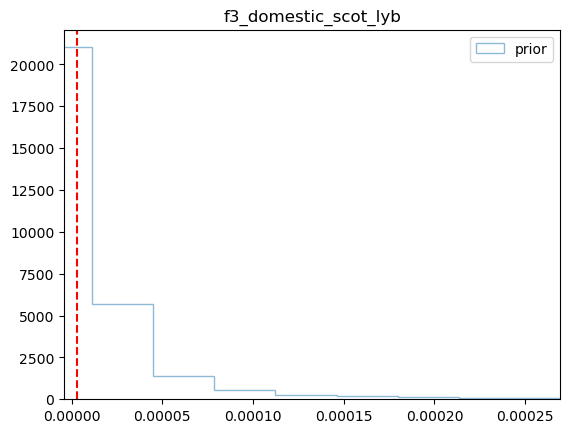

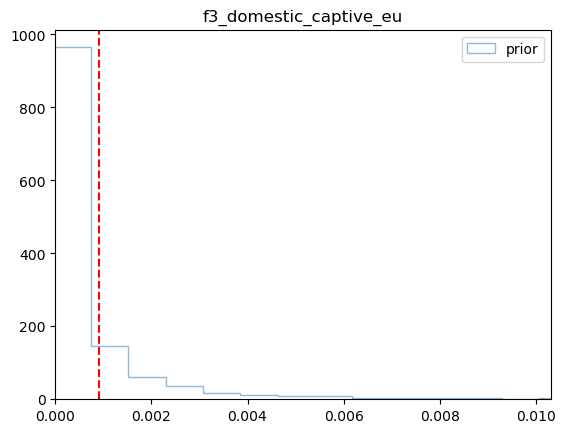

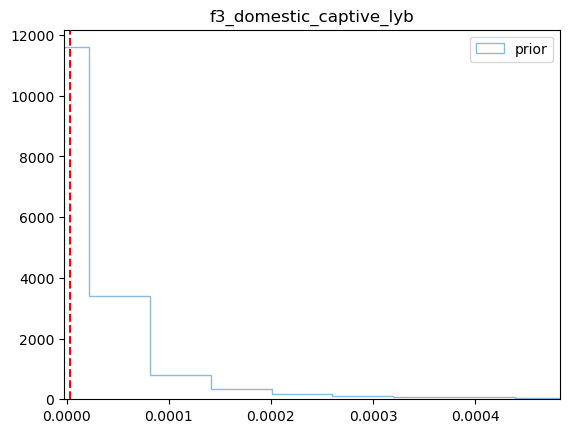

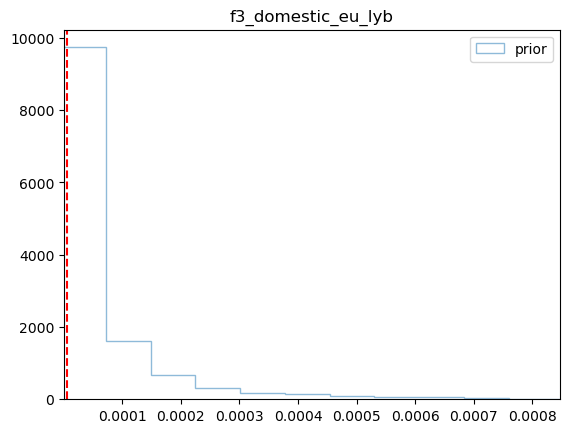

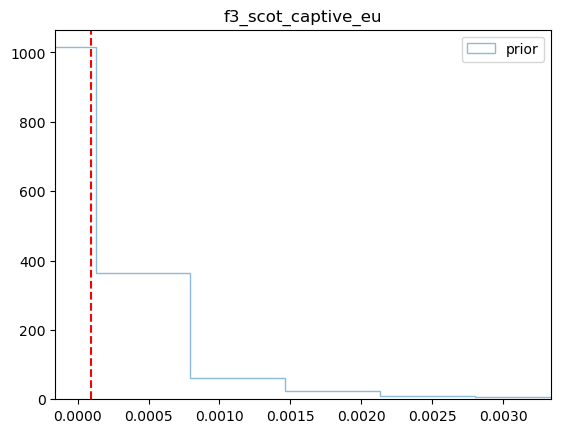

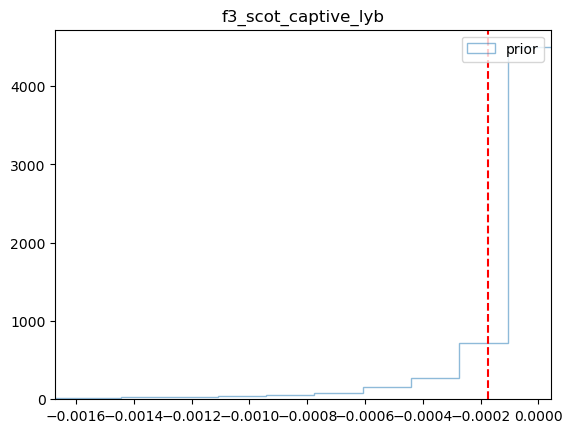

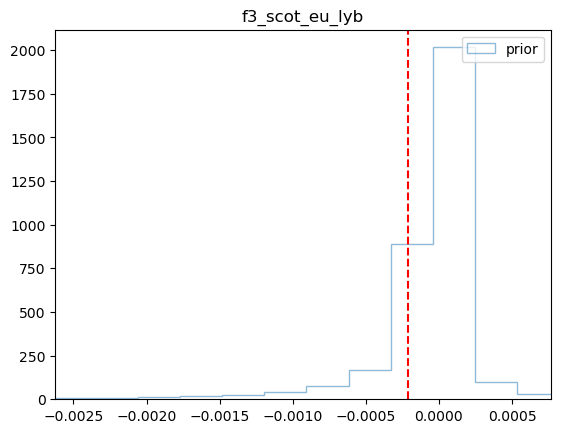

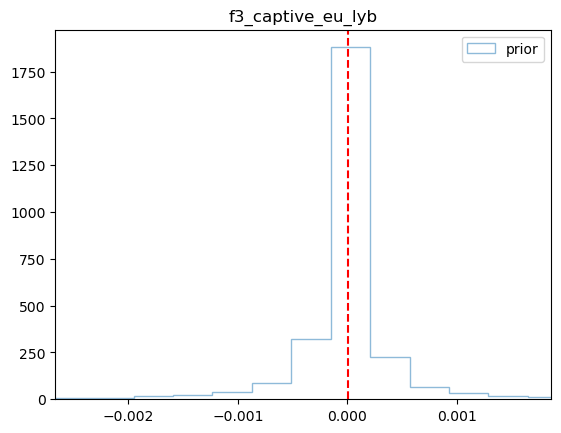

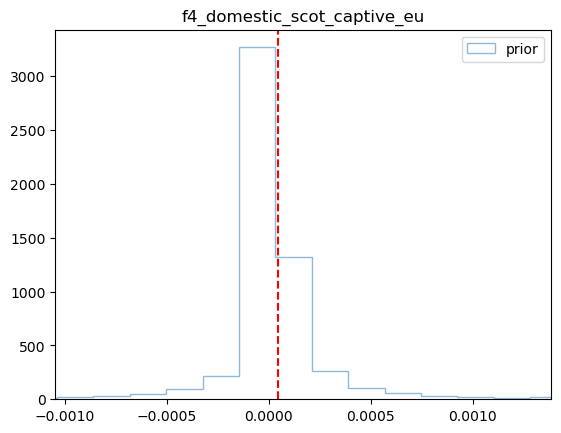

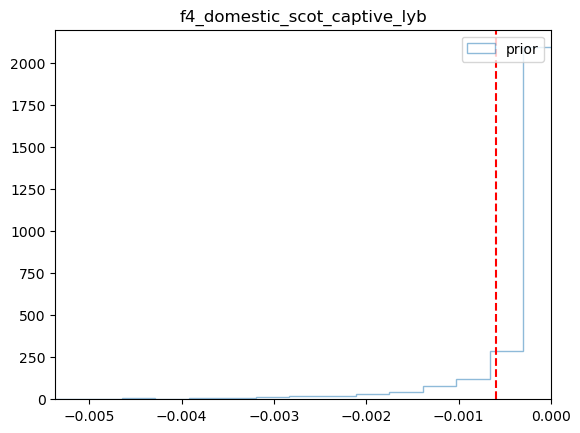

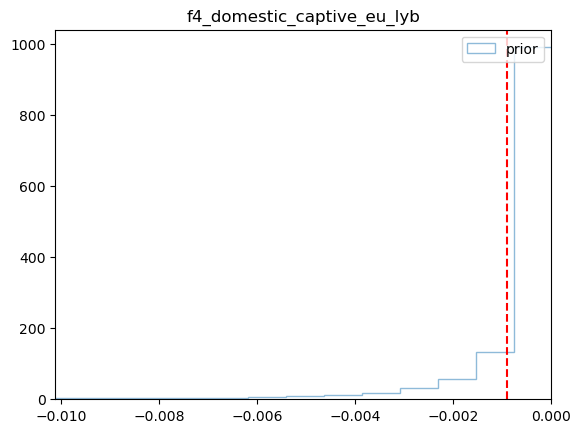

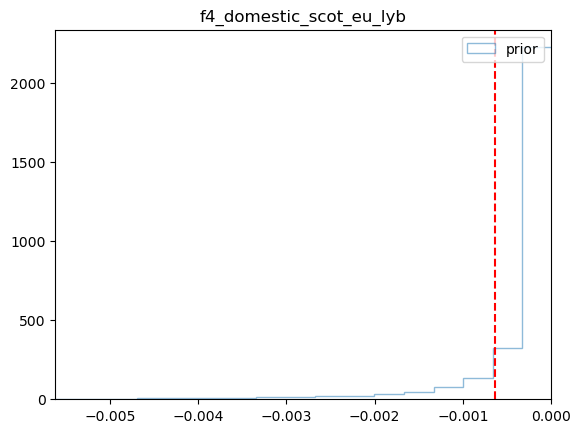

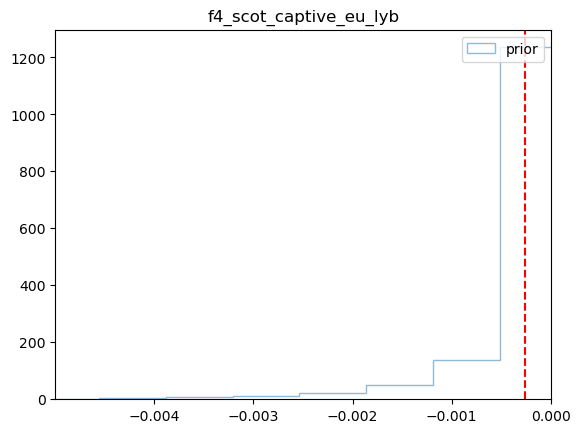

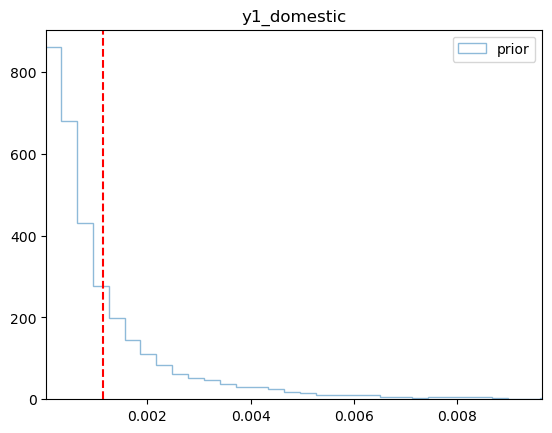

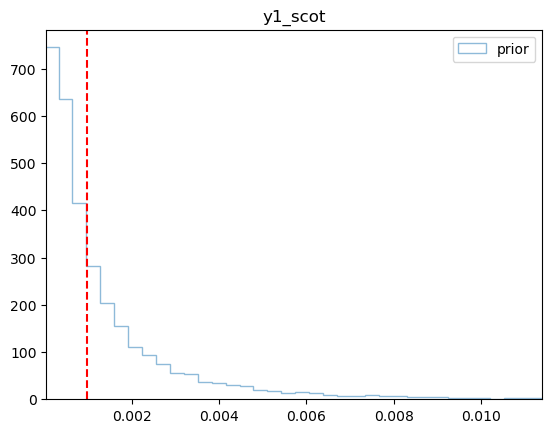

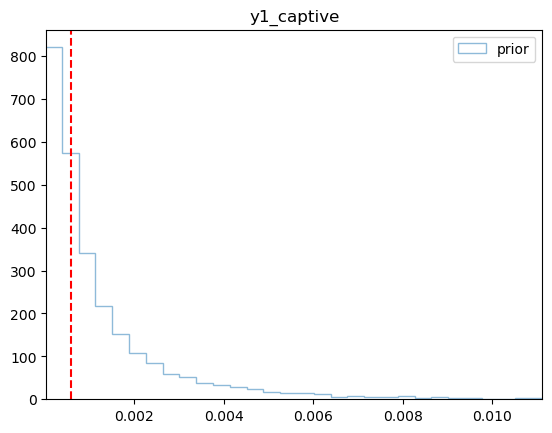

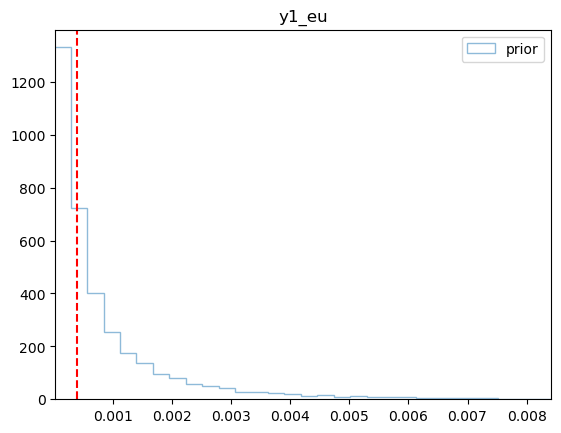

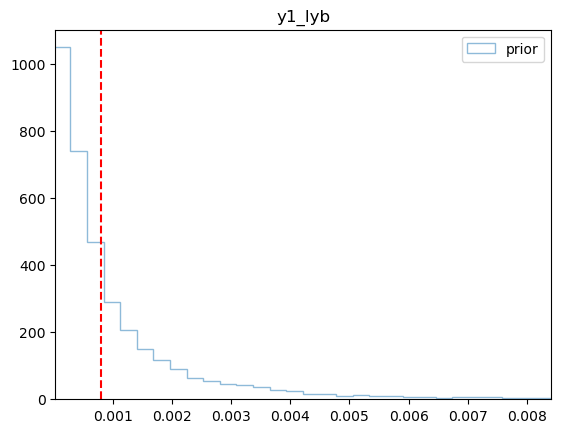

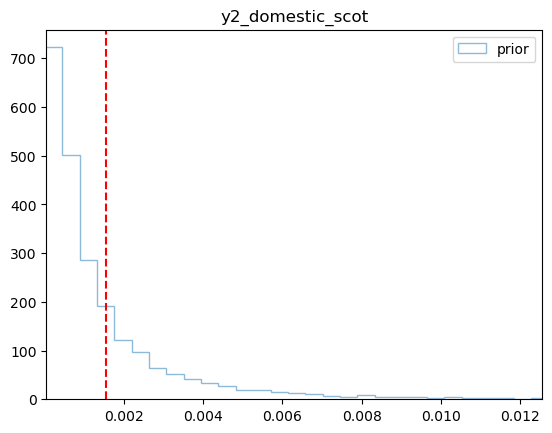

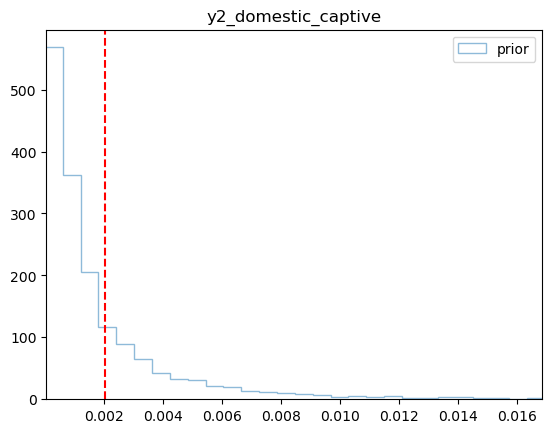

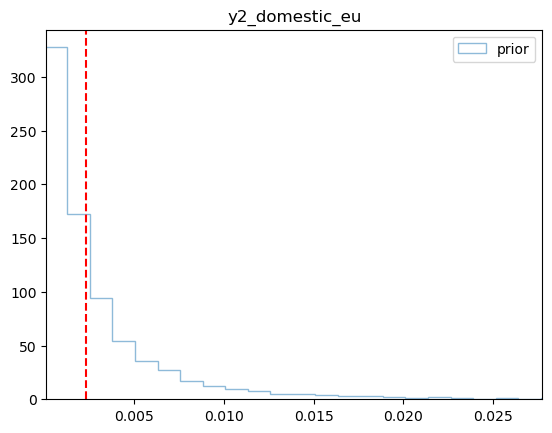

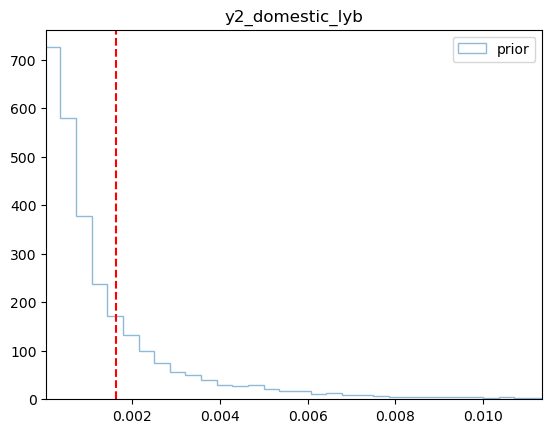

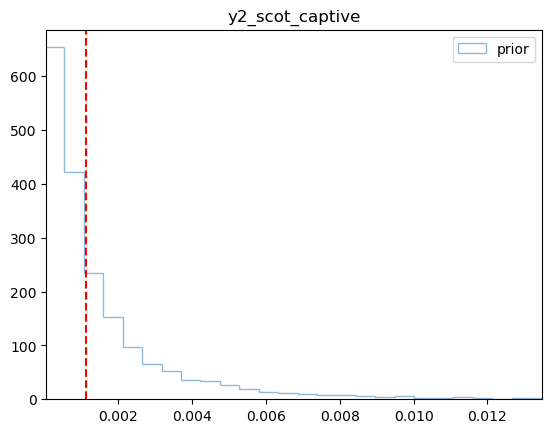

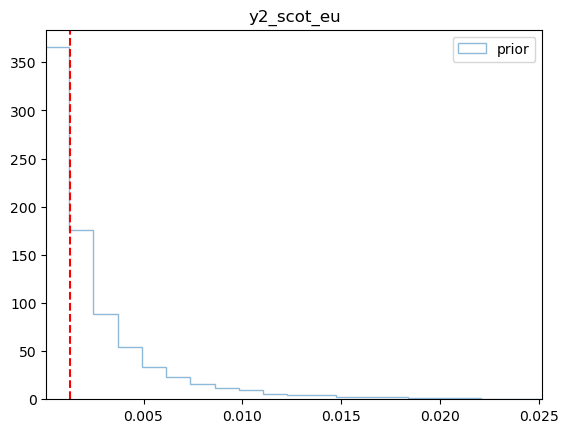

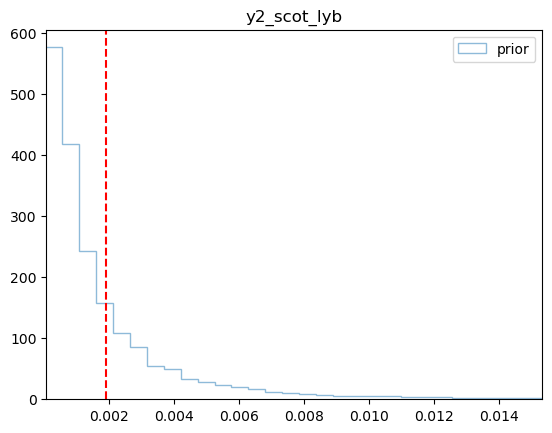

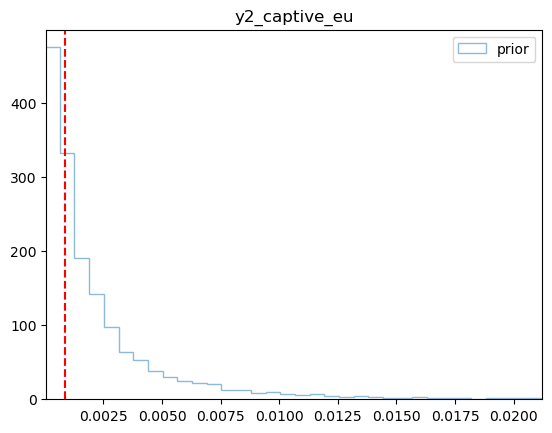

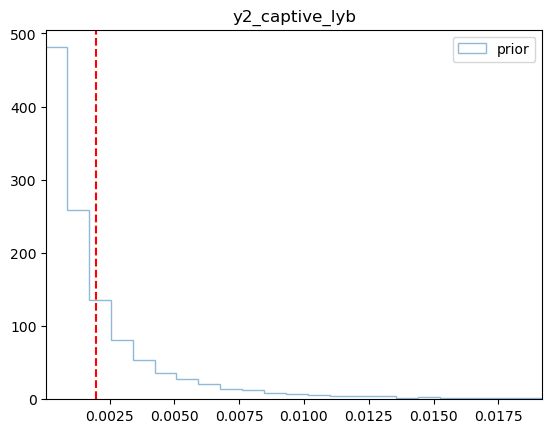

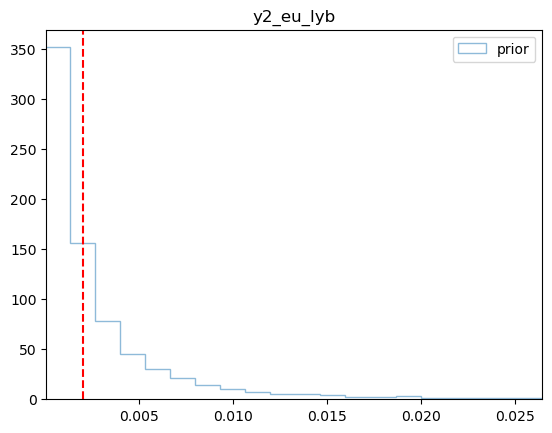

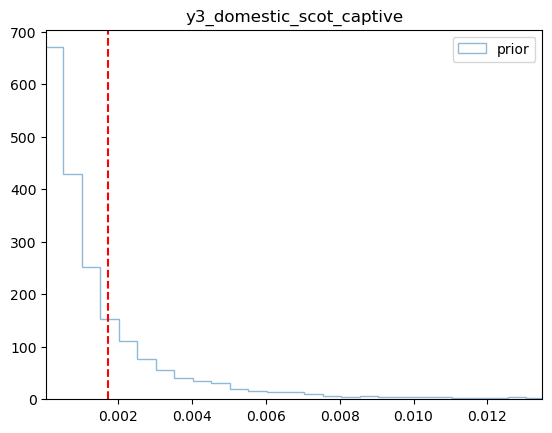

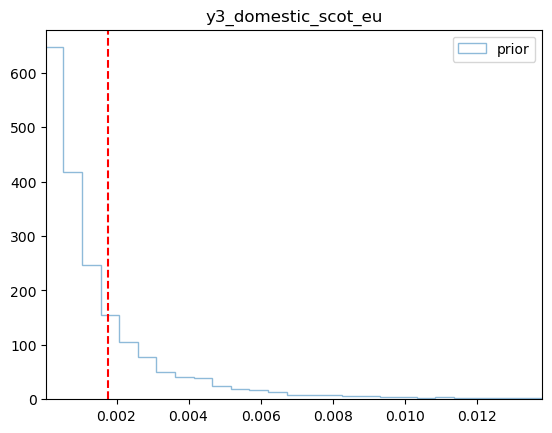

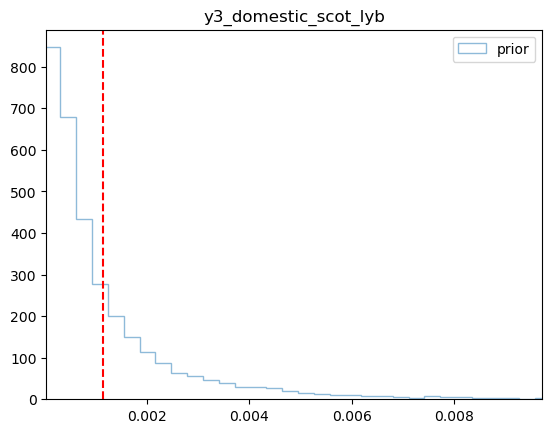

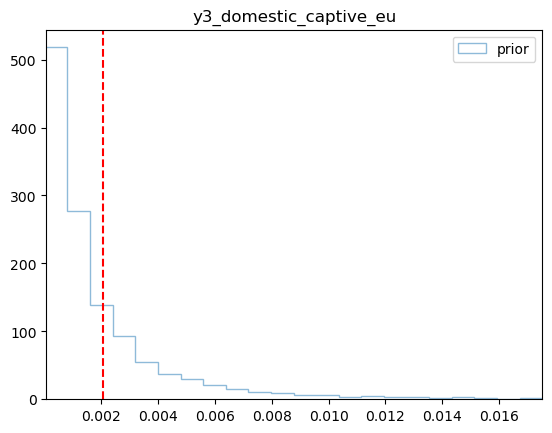

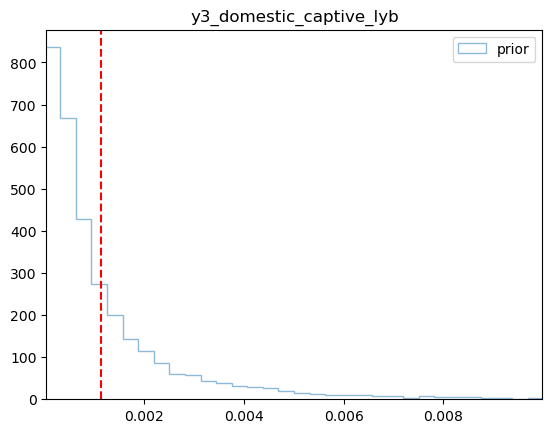

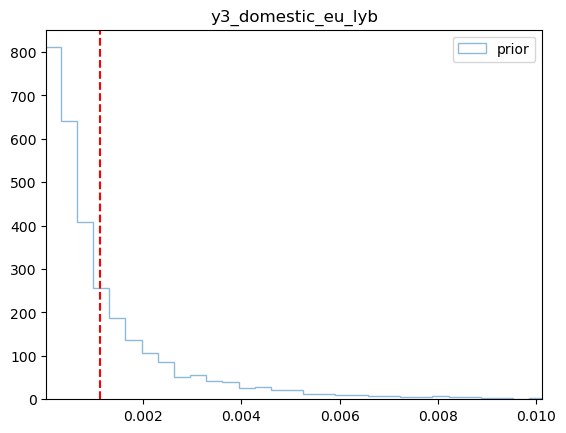

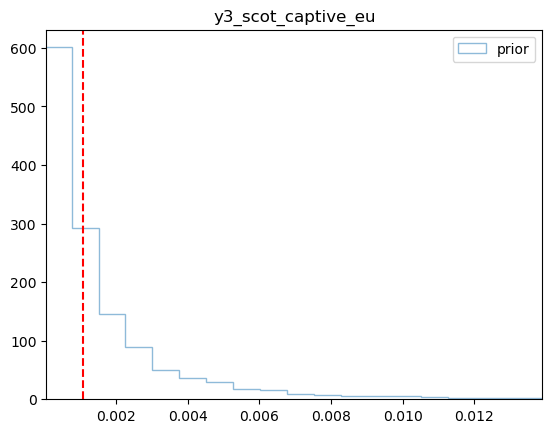

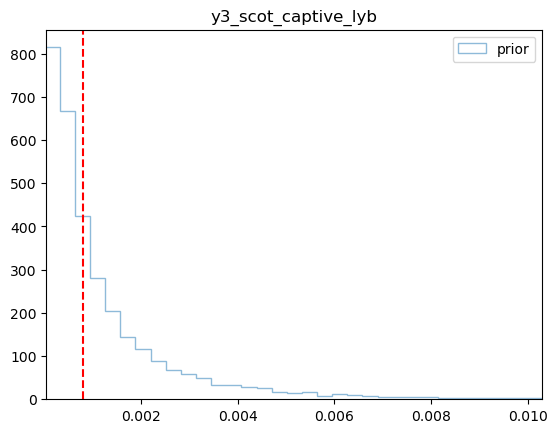

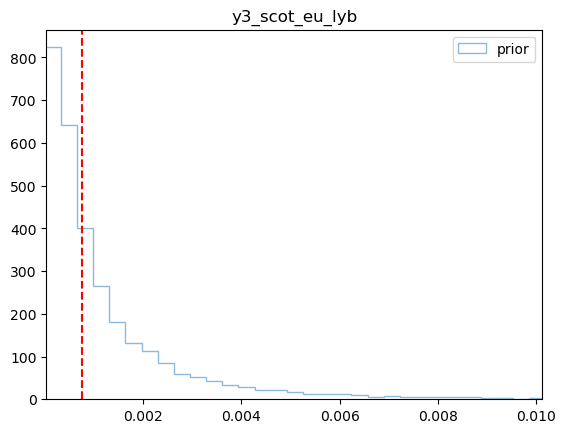

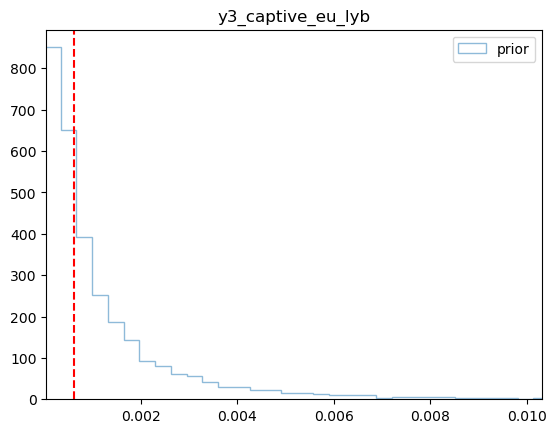

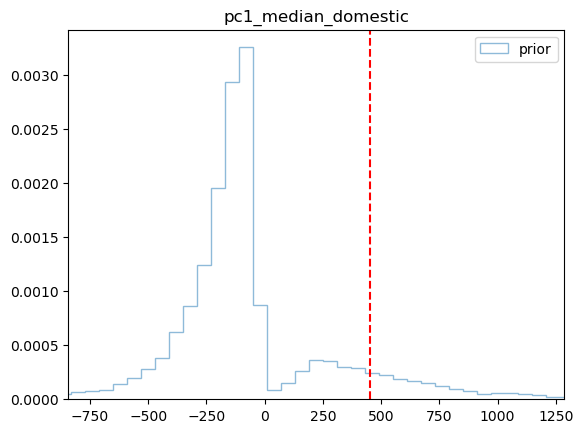

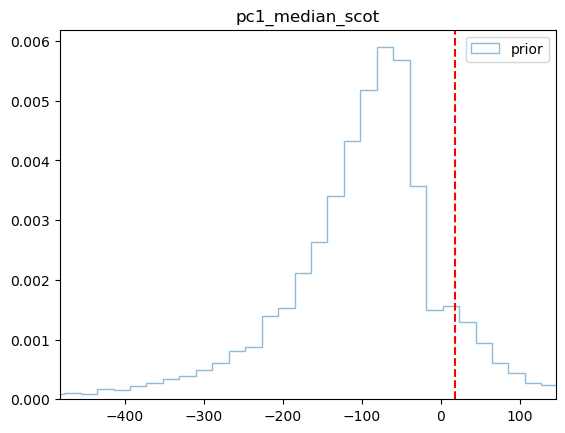

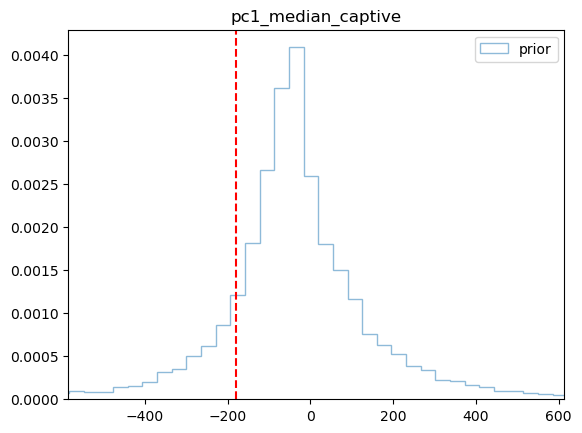

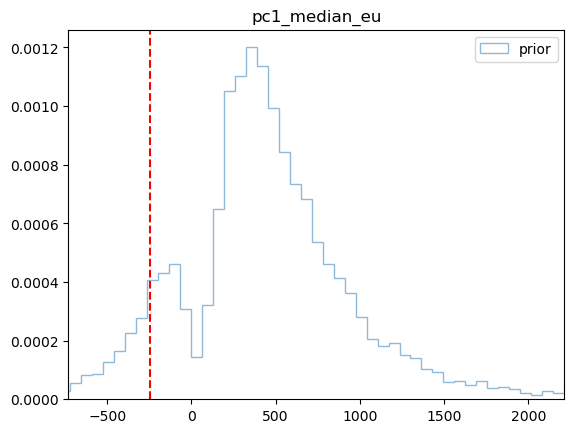

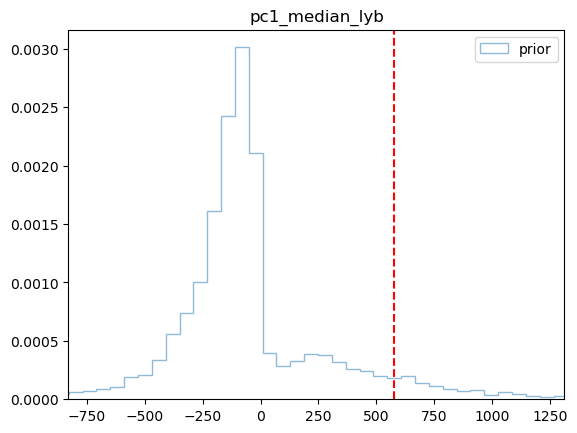

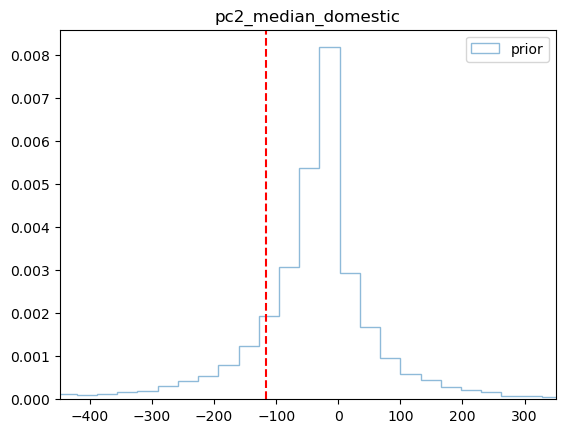

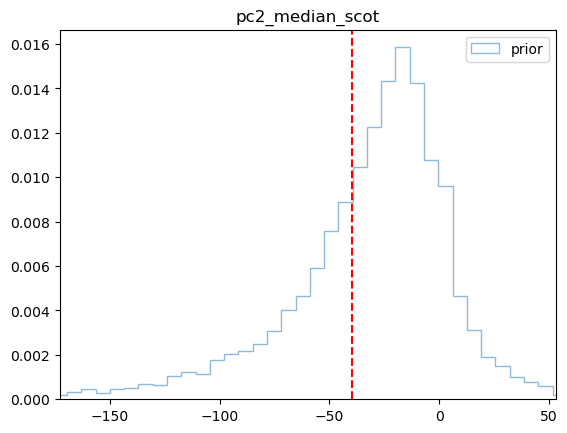

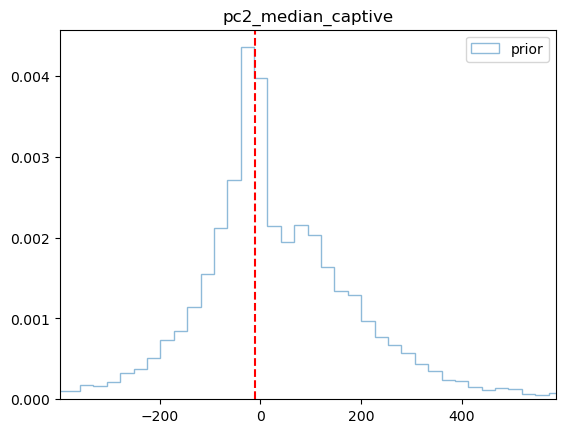

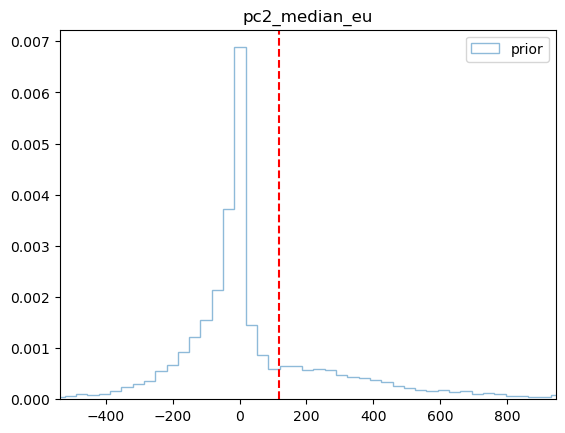

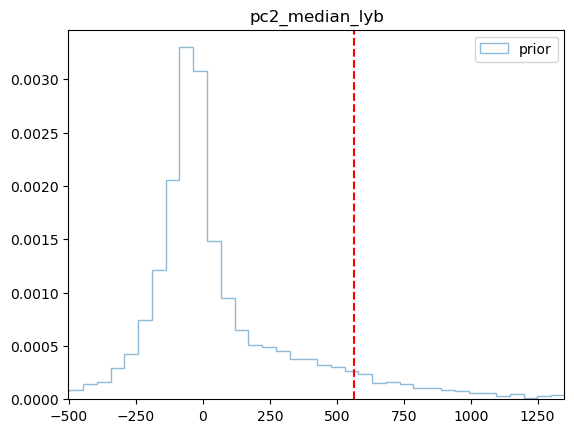

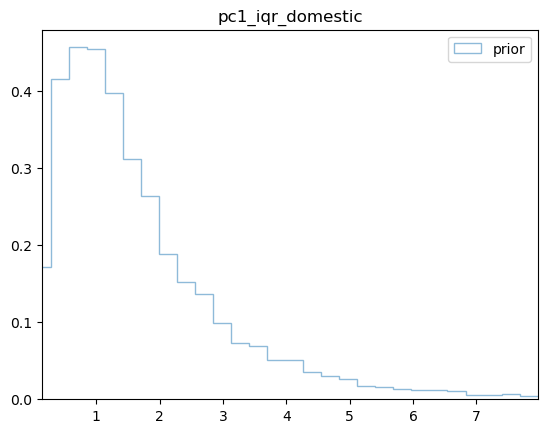

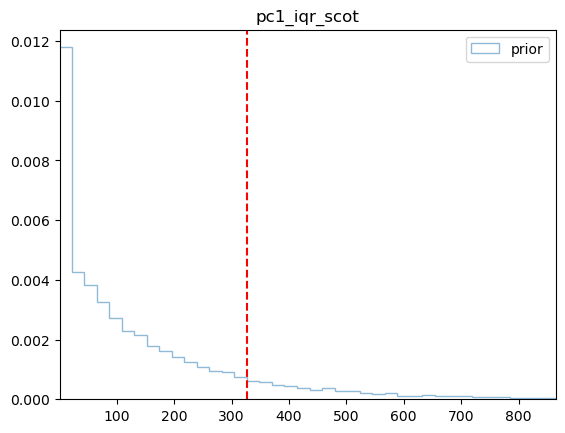

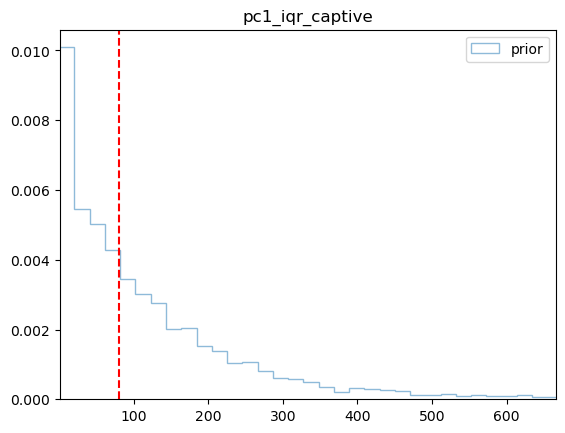

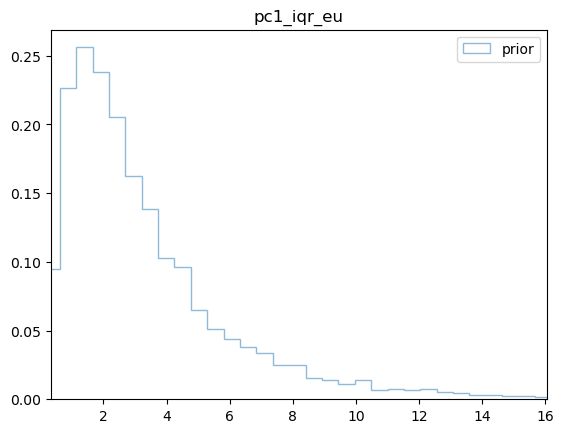

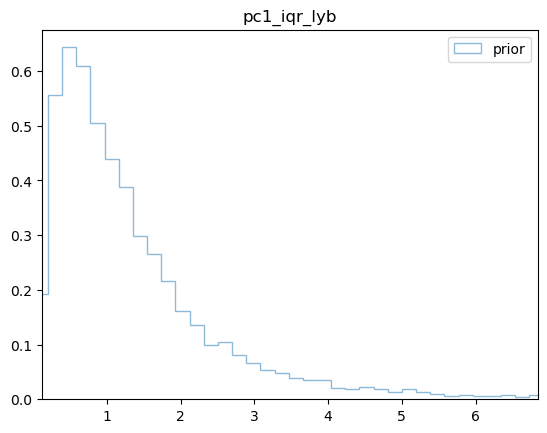

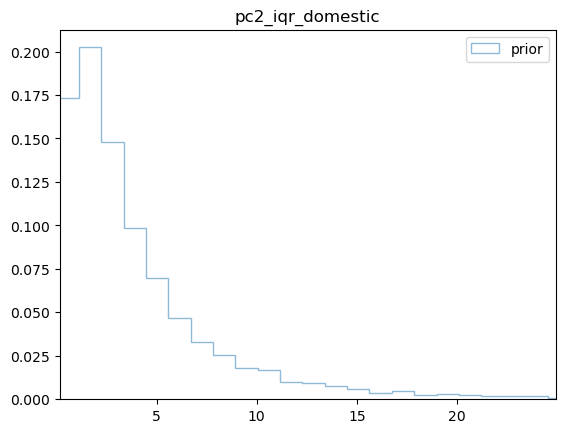

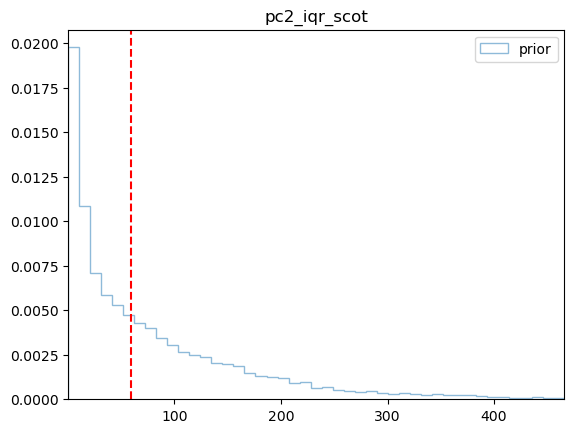

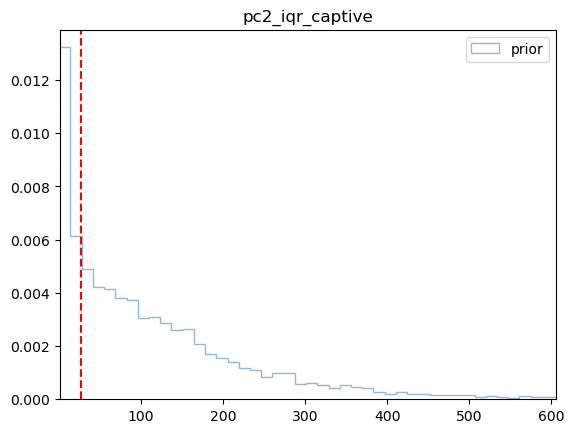

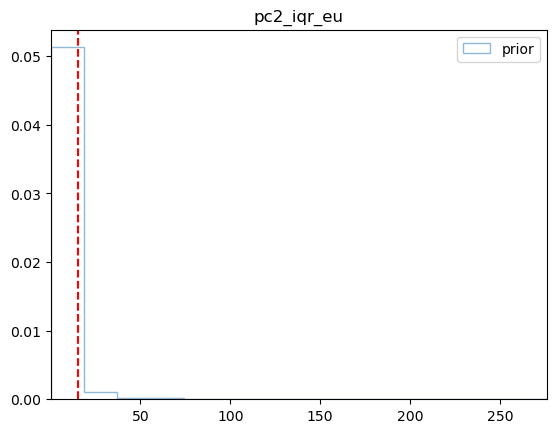

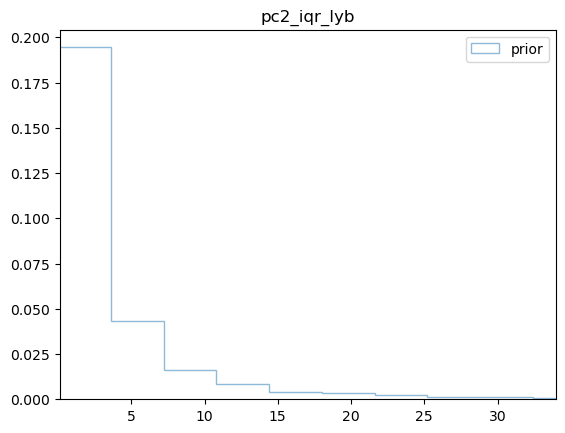

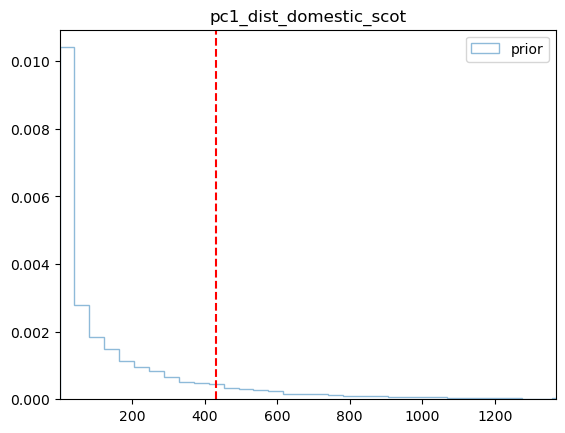

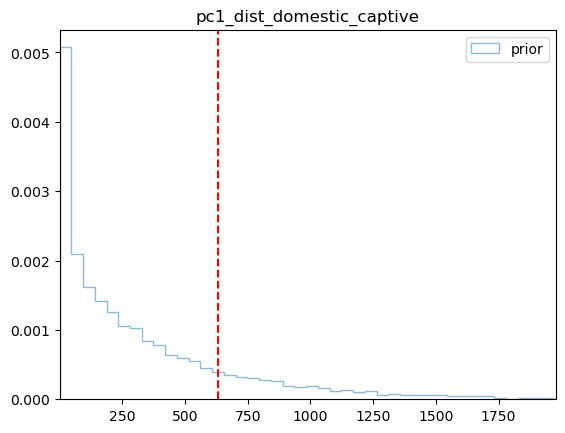

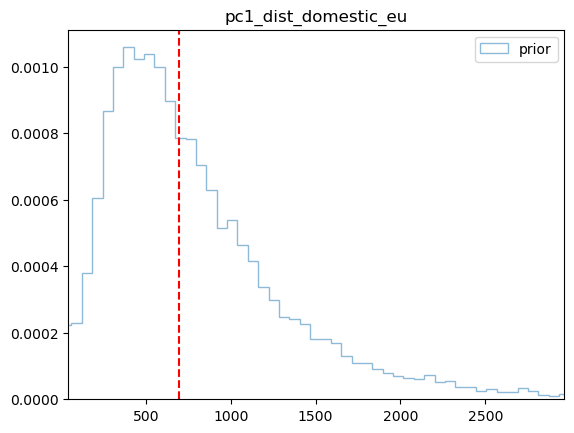

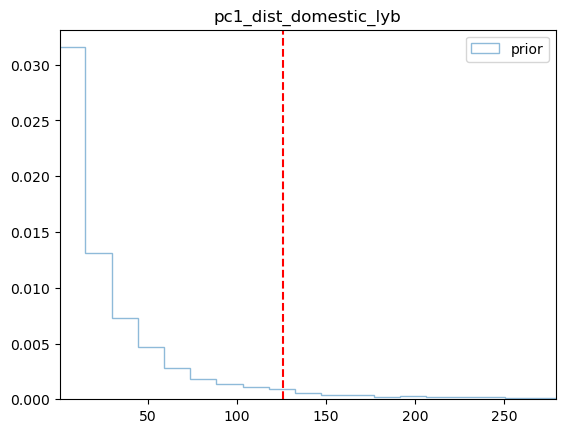

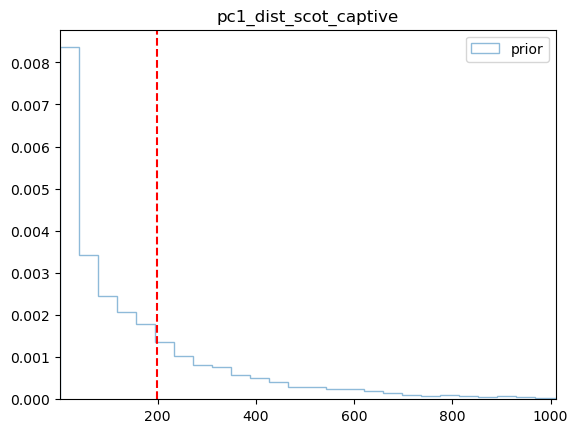

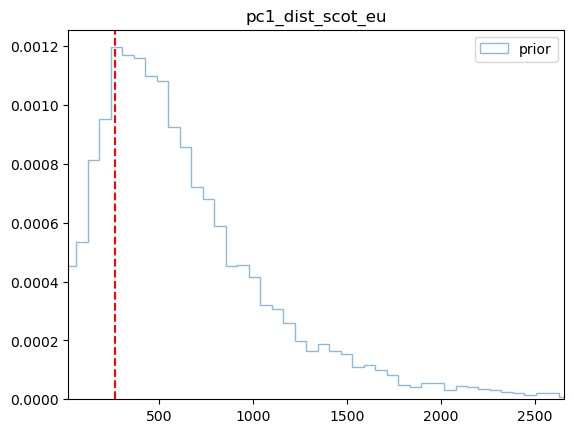

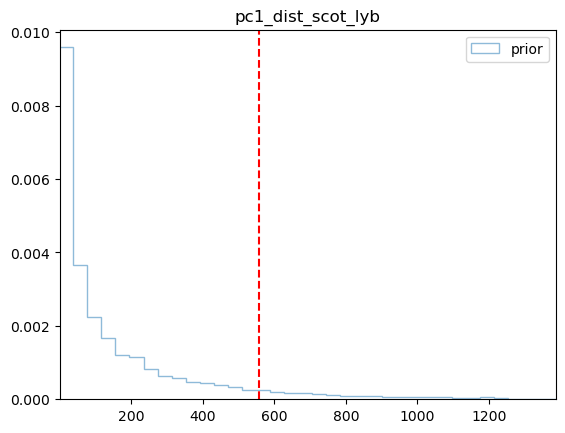

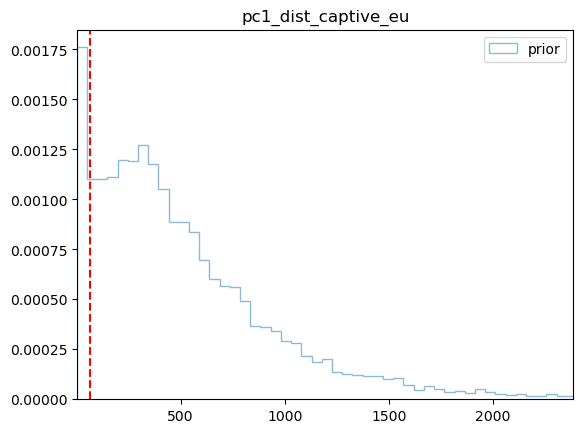

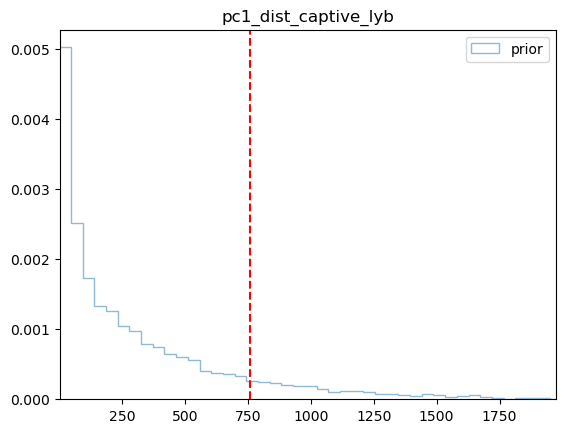

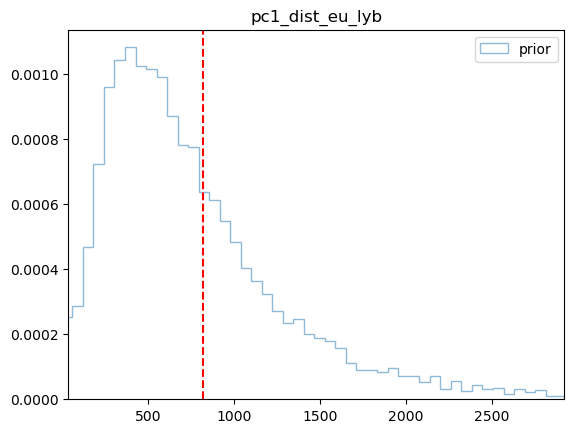

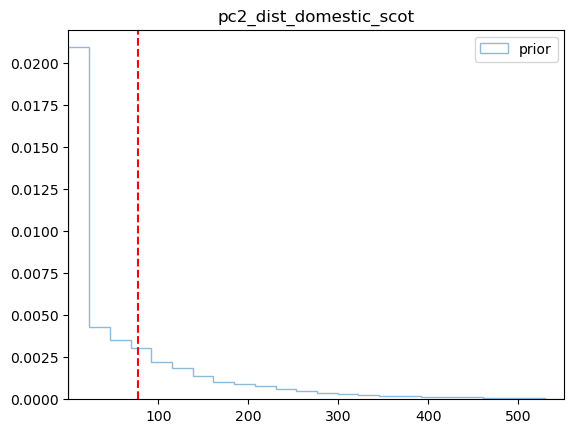

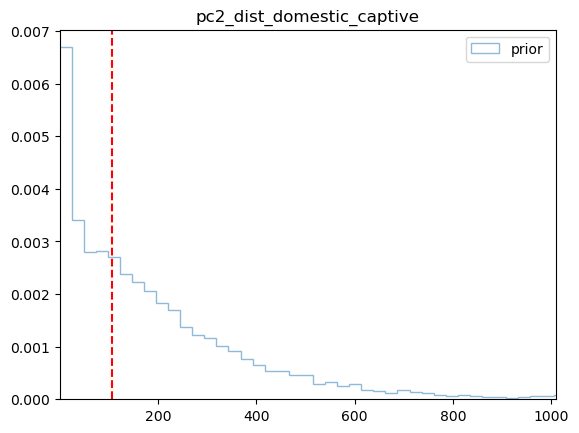

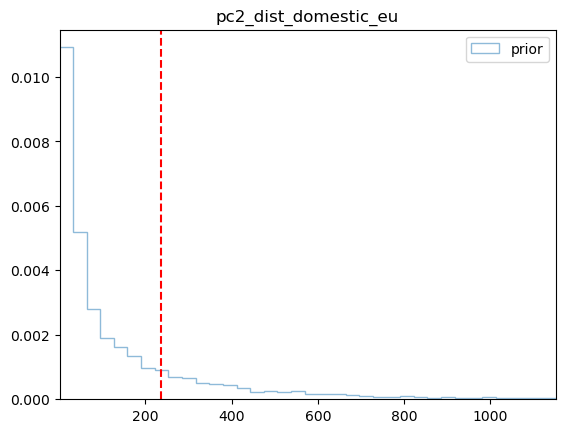

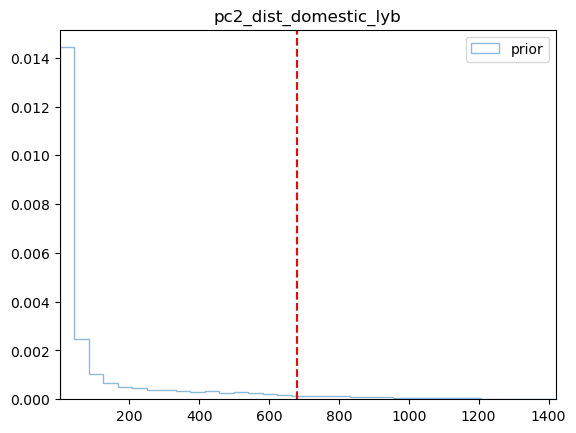

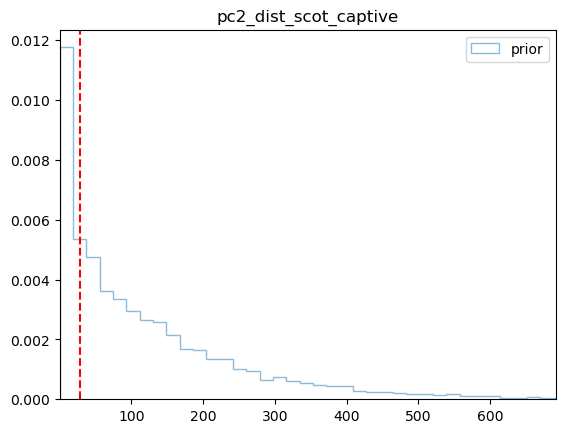

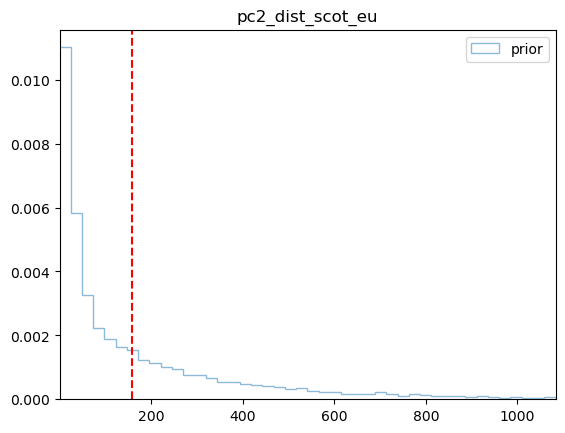

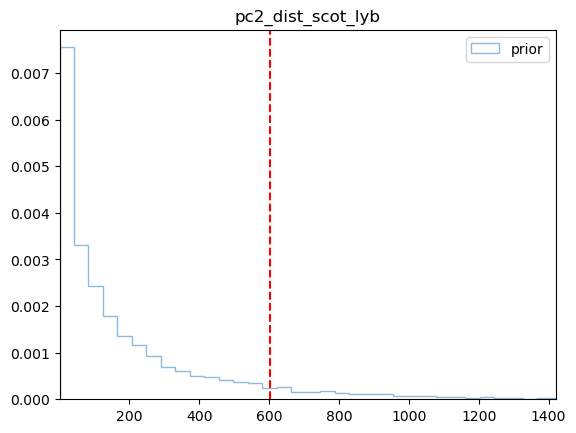

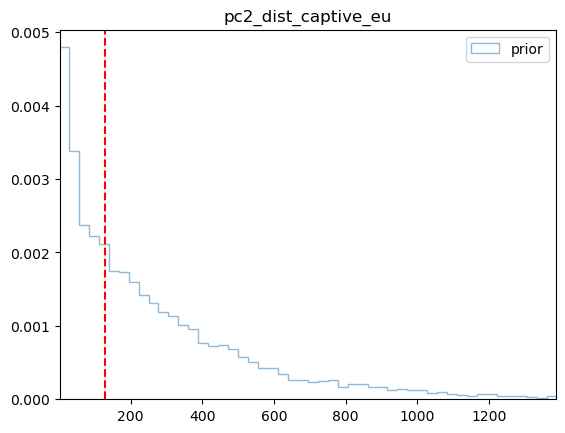

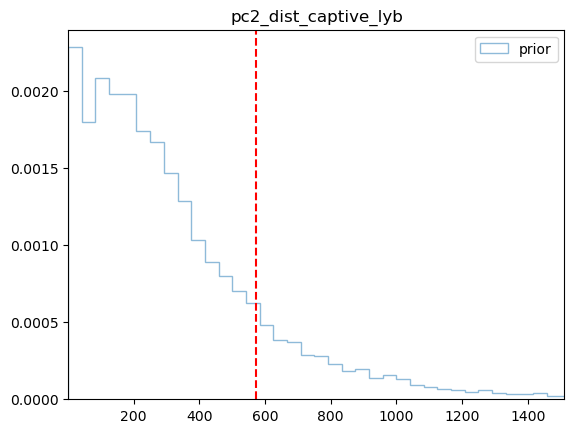

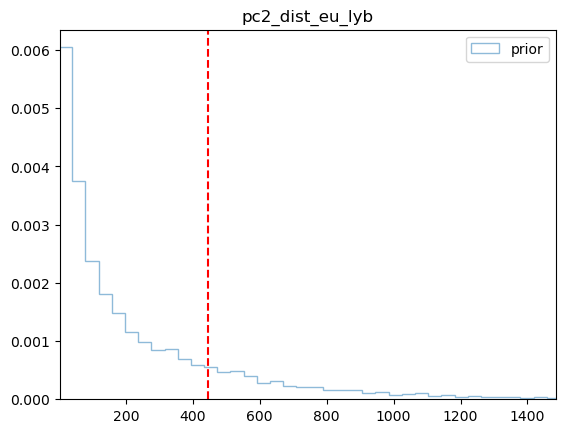

IndexError: index 134 is out of bounds for axis 1 with size 134

In [18]:
for num in range(0,len(x)-1):  
    plt.hist(x[:,num],
             alpha=0.5,
             label='prior', bins=100, density=True, histtype='step')

    #plt.hist(x2[:,num],
    #         alpha=0.5,
    #         label='r2', bins=100, density=True, histtype='step')

   # plt.hist(x3[:,num],
    #         alpha=0.5,
    #         label='r3', bins=100, density=True, histtype='step')
    
   # plt.hist(x4[:,num],
    #         alpha=0.5,
     #        label='r4', bins=100, density=True, histtype='step')
    
    plt.axvline(x=x_o[:,num], color='red', linestyle='--')

    plt.legend(loc='upper right')
    plt.title(stats[num])
    #plt.yticks([])
    plt.xlim(lims[num])
    plt.show()